# Notebook examples for Chapter 7

In [1]:
import warnings
# these are innocuous but irritating
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
%matplotlib inline

## Probabilistic label relaxation

In [ ]:
run scripts/classify -a 4 -p [1,2,3,4] -L [10,10] -P imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
run scripts/plr imagery/AST_20070501_pca_classprobs.tif

In [ ]:
%run scripts/dispms -f imagery/AST_20070501_pca_class.tif -c -d [400,400,300,300] \
-F imagery/AST_20070501_pca_classprobs_plr.tif -C -D [400,400,300,300] \
#-s '/home/mort/LaTeX/new projects/CRC4/Chapter7/fig7_1.eps'

## Accuracy assessment

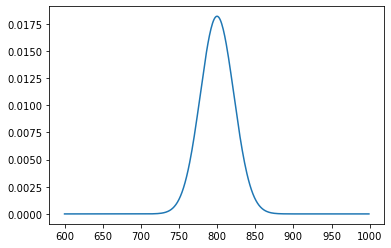

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

theta = 0.4
n = 2000
x = np.arange(600, 1000)
# pmf = probability mass function
plt.plot(x, binom.pmf(x, n, theta))

#plt.savefig('/home/mort/LaTeX/new projects/CRC4/Chapter7/fig7_2.eps')

In [ ]:
run scripts/ct imagery/AST_20070501_pca_MaxLike.tst

### Accuracy assessment on the GEE

In [4]:
import ee
ee.Initialize()

# first 4 principal components of ASTER image
image = ee.Image('users/mortcanty/supervisedclassification/AST_20070501_pca') \
            .select(0,1,2,3)

# training data
table = ee.FeatureCollection('users/mortcanty/supervisedclassification/train')

# sample the image with the polygons to a feature  
# collection, rename the class id columns from strings to 
# integers and add a column of random numbers in [0,1]
trainTestData = image.sampleRegions(collection=table,
                                    properties=['CLASS_ID'],
                                    scale=15) \
    .remap(['0','1','2','3','4','5','6','7','8','9'],
           [0,1,2,3,4,5,6,7,8,9],'CLASS_ID') \
    .randomColumn('rand',seed=12345) 

# filter on the random column to split into training and test
# feature collections in the ration of 2:1
trainData = trainTestData.filter(ee.Filter.lt('rand',0.67))
testData = trainTestData.filter(ee.Filter.gte('rand',0.67))

print 'train pixels: %i'%trainData.size().getInfo()
print 'test pixels:  %i'%testData.size().getInfo()

# train a naive Bayes classifier on training data   
classifier = ee.Classifier.continuousNaiveBayes()
trained = classifier.train(trainData,'CLASS_ID',
                                   image.bandNames())
   
# test the trained classifier with the test data
tested = testData.classify(trained)

# generate a confusion matrix with the classified test data
confusionmatrix = tested.errorMatrix('CLASS_ID',
                                          'classification')

print 'accuracy: %f'%confusionmatrix.accuracy().getInfo()
print 'kappa:    %f'%confusionmatrix.kappa().getInfo()

SyntaxError: invalid syntax (3420780723.py, line 26)

### Crossvalidation

In [5]:
run scripts/crossvalidate -p [1,2,3,4] -a 6 -e 100 -L [10,10]  imagery/AST_20070501_pca.tif imagery/train.shp

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(usage)? (crossvalidate.py, line 52)

<Figure size 432x288 with 0 Axes>

### Model comparison

In [ ]:
run scripts/classify -p [1,2,3,4] -a 4 -e 5000 -L [10] imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
run scripts/classify -p [1,2,3,4] -a 1 imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
run scripts/mcnemar imagery/AST_20070501_pca_NNet(Congrad).tst imagery/AST_20070501_pca_MaxLike.tst

In [ ]:
run scripts/classify -p [1,2,3,4] -a 7 imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
run scripts/mcnemar imagery/AST_20070501_pca_NNet(Congrad).tst imagery/AST_20070501_pca_SVM.tst

In [ ]:
run scripts/classify -p [1,2,3,4] -a 6 -e 5000 -L [10] imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
run scripts/mcnemar imagery/AST_20070501_pca_NNet(Congrad).tst imagery/AST_20070501_pca_Dnn(tensorflow).tst

## Adaptive boosting

In [ ]:
run scripts/adaboost -p [1,2,3,4,5,6]  -L 10 -n 75 imagery/AST_20070501_pca.tif  imagery/train.shp

In [ ]:
ls imagery

In [ ]:
run scripts/dispms -f /home/mort/python/CRC4Docker/src/imagery/AST_20070501_pca_class.tif -c

## Hyperspectral image analysis

In [6]:
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import numpy as np
import matplotlib.pyplot as plt

inDataset = gdal.Open('myimagery/97_radianz_registriert_voll',GA_ReadOnly)                       
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    
bands = inDataset.RasterCount
print (rows, cols, bands)

AttributeError: 'NoneType' object has no attribute 'RasterXSize'

In [7]:
Im = np.zeros((rows,cols,bands)) 
for b in range(bands):
    band = inDataset.GetRasterBand(b+1)
    Im[:,:,b] = band.ReadAsArray(0,0,cols,rows)  

NameError: name 'rows' is not defined

In [ ]:
# spectral cut
plt.plot(Im[300,300,:])
plt.savefig('/home/mort/LaTeX/new projects/CRC4/Chapter7/fig7_6.eps',bbox_inches='tight')

In [ ]:
run scripts/mnf.py myimagery/97_radianz_registriert_voll

### Anomaly detection

In [ ]:
run scripts/rx imagery/may0107

In [ ]:
run scripts/dispms -f imagery/may0107_rx -e 1 -d [600,600,400,400]

In [ ]:
run scripts/krx -s 2000 imagery/may0107

In [ ]:
run scripts/dispms -f imagery/may0107_rx -e 2 -d [600,600,250,250] \
-F imagery/may0107_krx -E 2 -D [600,600,250,250] \
#-s '/home/mort/LaTeX/new projects/CRC4/Chapter7/fig7_8.eps'